# Understanding No-shows: A first investigation into factors influencing the non-attendance of medical appointments in Brazil


## Table of Contents
<ul>
<li><a href="#intro">1. Introduction</a></li>
<li><a href="#wrangling">2. Data Wrangling</a></li>
<li><a href="#eda">3. Exploratory Data Analysis</a></li>
<li><a href="#conclusions">4. Conclusions</a></li>
</ul>

<a id='intro'></a>

## 1. Introduction

This project is an investigation into potential factors connected to patients not showing up to their scheduled doctor's appointments.
The underlying dataset used for this analysis includes information from 100k medical appointments in Brazil. In addition to patient and appointment ID a number of characteristics about the patient are included in each row.

The dataset has been taken from [Kaggle](https://www.kaggle.com/joniarroba/noshowappointments) as part of a data analysis project for [Udacity's Data Analyst Nanodegree](https://www.udacity.com/course/data-analyst-nanodegree--nd002).
<br>

### 1.2 Questions to explore
The analysis will provide first answers to the following three research questions:
1. What is the overall no-show share across the dataset? <br> 
    1.A  Is there a characteristic that stands out for no-show appointments?
2. Does alcoholisms show different shares in no-shows when comparing men and women? <br>
    2.A Is there a differences when comparing age categories?
3. What can be said about the time passed between scheduling day and appointment date for no-show and attended appointments?

### 1.3 Packages used
The following `Python` packages are used to wrangle, explore and perform a first analysis to answer the above questions:
- The `NumPy` package; a fundamental package for scientific computing with Python adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.
- `Pandas` provides high-performance, easy-to-use data structures and data analysis tools.
- The `matplotlib.pyplot` package; a plotting library that provides an object-oriented API for embedding plots into applications.
- `Seaborn` data visualization library based on matplotlib that provides a high-level interface for drawing attractive and informative statistical graphics.

All of these packages have standard aliases, to make their application easier. These alliases are denominated by `as`. In addition the following style packages are used:
- `%matplotlib inline`; which adds the plots created directly into the jupyter notebook.
- `sns.set_style('darkgrid')`; which sets the aesthetic style to darkgrid to the plots.

The following code block imports the packages described above.

In [1]:
# Loading packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

<a id='wrangling'></a>
## 2. Data Wrangling

In this section of the report the data is loaded into the notebook, checked for quality and tidiness issues through visual and programmatic assessment methods and the documented issues are cleaned in a copy of the loaded DataFrame. A clean version of the dataset is then saved for ease of further analysis. This way the original dataset is protected from accidental modifications.

### 2.1 General Properties and Assessment of the Dataset
- First step understanding the data first through visual assessment and then programmatic assessment
- During both assessments the dataset is inspected in terms of quality issues (i.e. content issues) and tidiness (i.e. structural issues)
- The observed issues have been documented simultanously and noted under <a href="#document">Assessment Documentation</a>

In [2]:
# Loading the data into a pandas DataFrame.
df_raw = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

The data is loaded as a pandas DataFrame into the `df_raw` variable. The name was chosen to indicate that this is the original data, that has not been cleaned of modified yet.

#### Visual Assessment
The visual assessment is the first step to investigate a dataset. By looking at the dataset in its entirety and understanding its structure, it is possible to get a sense of its structure, the information within the dataset and potential cleanliness and tidiness issues.

In [3]:
df_raw

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


Directly visible is that the `PatientId` is treated as a numerical value, the `No-show` information is entered as a string, the level of detail in the date columns is different and the naming of the columns is inconsistent. All points that will need to be looked at further in the programmatic assessment and then cleaned. <br>
The dataset is made up of 110'527 rows and 14 columns.

#### Programmatic Assessment
For the second assessment step `pandas` functions and methods are used to examine the dataset programmatically. As a start the `.info()` method is used, which provides information on the column names, non-null values and the data types present in the dataset as well as the number of their occurrences.

In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


It appears that there are no missing values, but there seem to be opportunities for improvement on the datatypes for the different column values. <br>
To confirm that there are no missing values, `.isna().sum()` is applied to the DataFrame, as this provides a clearer overview of any missing values.

In [5]:
df_raw.isna().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [6]:
df_raw.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


As is visible in the `.info()` method `PatientId` and `AppointmentID` are treated as numeric values (in this case float and int), the minimum of the `Age` column indicates there are inaccurate values in this column, as age cannot be negative and the maximum also seems unlikely, as the oldest recorded people in the world fall into that age range and current records place them mostly in Japan, Europe and the USA.

In [7]:
# Check for duplicates
df_raw['AppointmentID'].duplicated().value_counts()

False    110527
Name: AppointmentID, dtype: int64

Due to the structure and content of the dataset only the `AppointmentID` column allows for checking of duplicate entries. All other columns are made up of non-unique values, including `PatientId`, as the same patient can come in for several appointments. <br>
Based on the results of running the `.duplicated()` method and applying `.value_counts()`, there are no duplicated appointments in the dataset. <br>
Next follows the **Assessment Documentation**, which was compiled in parallel to the assessments and which is then followed by cleaning of the dataset.

<a id='document'></a>

#### Assessment Documentation
Based on the performed visual and programmatic assessment the following observations were made on how to improve quality and tidiness of the data.


#### 1. Quality

- The AppointmentID column is unnecessary for the analysis
- Column headings are either inconsistent, not clear or in a format that can cause errors in code (e.g. `PatientId`, `ScheduledDay`, `AppointmentDay`, `Hipertension`, `Handcap`, `No-show`)
- Erroneous datatypes (`PatientId`, `Gender`, `ScheduledDay` and `Appointment_Day`, `No-show`)
- Minimum and maximum of `Age` column are invalid

#### 2. Tidiness
- ScheduledDay column contains two variables: date and time


### 2.2 Cleaning of the Dataset

#### Defining the Cleaning steps
The documented quality and tidiness issues will be cleaned as defined below.
#### 1. Quality

- Drop `AppointmentID` column
- Change column headers `PatientId` to `Patient_ID`, `AppointmentDay` to `Appointment_Day`, `Hipertension` to `Hypertension`, `Handcap` to `Handicap`, `No-show` to `No_show`)
- Convert `Patient_ID` to `str`, `Gender` to `categorical`, `Scheduled_Day` and `Appointment_Day` to `datetime`, `No_show` to `int`
- Drop entry where `Age` column has entry of -1 and is > 105 

#### 2. Tidiness
- Separate the two variables into their own columns and change column headers to `Scheduled_Day` and `Scheduled_Time`; ensure datatype is `datetime` for both

In [8]:
# Create a copy of the DataFrame
df_clean = df_raw.copy()

To protect the original DataFrame from unwanted modifications, a copy is made on which to perform the cleaning. This copy is named `df_clean` to indicate in the end it will be a clean DataFrame.

In [9]:
# Drop AppointmentID column
df_clean = df_clean.drop('AppointmentID', axis=1)

In [10]:
# Renaming column headings
df_clean = df_clean.rename(columns={'PatientId':'Patient_ID',
                                    'AppointmentDay':'Appointment_Day',
                                    'Hipertension':'Hypertension',
                                    'Handcap':'Handicap',
                                    'No-show':'No_show'})

`ScheduledDay` is renamed together with separating the two variables.

In [11]:
# Changing datatypes and entries for No_show
df_clean['No_show'] = df_clean['No_show'].replace({'Yes': '1', 'No': '0'}).astype(int)

In [12]:
# Changing datatypes
df_clean['Patient_ID'] = df_clean['Patient_ID'].astype(int).astype(str)
df_clean['Gender'] = df_clean['Gender'].astype('category')
df_clean['ScheduledDay'] = pd.to_datetime(df_clean['ScheduledDay'])
df_clean['Appointment_Day'] = pd.to_datetime(df_clean['Appointment_Day'])

Changing the rest of the datatypes is easy and can be done in one go. Checking of success is done at the end of the cleaning process.

In [13]:
# Drop entries where ages are recorded as less than 0 and greater than 105
df_clean.drop(df_clean.index[df_clean['Age'] <= 0], inplace = True)
df_clean.drop(df_clean.index[df_clean['Age'] > 105], inplace = True)

In [14]:
#Creating new columns from ScheduledDay to separate out the date and time information
df_clean['Scheduled_Day'] = [d.date() for d in df_clean['ScheduledDay']]
df_clean['Scheduled_Time'] = [d.time() for d in df_clean['ScheduledDay']]

In [15]:
# Ensuring the data type is correct
df_clean['Scheduled_Day'] = pd.to_datetime(df_clean['Scheduled_Day'])

After creating two columns with the information on time and date, the datatype has to be changed again, to ensure it is still datetime.

In [16]:
# Reordering the columns
df_clean.drop('ScheduledDay', axis=1, inplace=True)
df_clean = df_clean.reindex(columns=['Patient_ID', 'Gender', 'Scheduled_Day', 'Scheduled_Time'] + list(df_clean.columns[2:-2]))

The original column `ScheduledDay` remains after the separation, but as it is no longer needed, it can be dropped from the DataFrame. <br>
The correction of the tidiness issues results in a new order in the DataFrame. This can be changed back to the original order through `.reindex()`.

### 2.3 Testing the changes made
Following the cleaning process, it needs to be tested that all the issues have been resolved and the DataFrame has the desired structure, before saving the cleaned version to a new `.csv-file`.

In [17]:
df_clean.head()

,Patient_ID,Gender,Scheduled_Day,Scheduled_Time,Appointment_Day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,29872499824296,F,2016-04-29,18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,558997776694438,M,2016-04-29,16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4262962299951,F,2016-04-29,16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,867951213174,F,2016-04-29,17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,8841186448183,F,2016-04-29,16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0


Names and order of the columns is as wanted, the index starts at 0 and entries in `No_Show` have changed, indicating success of the cleaning process. This is further confirmed by applying the `.info()` and `.describe()` methods.

In [18]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106982 entries, 0 to 110526
Data columns (total 14 columns):
Patient_ID         106982 non-null object
Gender             106982 non-null category
Scheduled_Day      106982 non-null datetime64[ns]
Scheduled_Time     106982 non-null object
Appointment_Day    106982 non-null datetime64[ns]
Age                106982 non-null int64
Neighbourhood      106982 non-null object
Scholarship        106982 non-null int64
Hypertension       106982 non-null int64
Diabetes           106982 non-null int64
Alcoholism         106982 non-null int64
Handicap           106982 non-null int64
SMS_received       106982 non-null int64
No_show            106982 non-null int64
dtypes: category(1), datetime64[ns](2), int64(8), object(3)
memory usage: 11.5+ MB


In [19]:
df_clean.describe()

,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
count,106982.000000,106982.000000,106982.000000,106982.000000,106982.000000,106982.000000,106982.000000,106982.000000
mean,38.312501,0.101036,0.203773,0.074246,0.031407,0.022938,0.323269,0.202623
std,22.460622,0.301377,0.402804,0.262172,0.174416,0.164010,0.467727,0.401956
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,102.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000


The same programmatic assessment is performed as in the beginning to check that the cleaning was successful, which it has been. Now the cleaned data can be saved to a new file.

In [20]:
# Saving the cleaned data into a new .csv file for future analysis
df_clean.to_csv('noshowappointments-kagglev2-may-2016_clean.csv', index=False)

<a id='eda'></a>
## 3. Exploratory Data Analysis

After cleaning the data, it is time to move on to exploration, computation of statistics and visualizations to address the research questions posed in the Introduction section. 

In [21]:
# Loading the clean data into a pandas DataFrame.
df = pd.read_csv('noshowappointments-kagglev2-may-2016_clean.csv')

As a first step the clean data is loaded into a pandas DataFrame. This is done so when revisiting the jupyter notebook, only the packages at the beginning need to be reloaded. The entire cleaning process does not have to be preformed again.

### Exploration of limitations of the dataset
During the assessment phase it was already found that the dataset does not contain missing values. Therefore, in order to understand the limitations of the dataset better, a closer look at age and gender representation is made across the dataset.

In [ ]:
# Creating separate DataFrames for the two genders
women = df.query('Gender == "F"')
men = df.query('Gender == "M"')

In [ ]:
locations = [1, 2]
colors = ['salmon', 'cornflowerblue']
heights = [women['Gender'].value_counts().sum(), men['Gender'].value_counts().sum()]
labels = ['Women', 'Men']
plt.bar(locations, heights, tick_label=labels, color=colors)
plt.title('Gender Representation in the dataset')
plt.ylabel('# of patients');

In [ ]:
# Taking a closer look at the sex ratio
(men['Age'].value_counts().sum())/(women['Age'].value_counts().sum())

If the dataset were to represent the Brazilian population accurately one would expect a 0.97 male/female sex ratio for the country [IndexMundi](https://www.indexmundi.com/brazil/sex_ratio.html). The dataset, however, shows a sex ratio of 0.53, meaning that men are underrepresented in this dataset, which is a point to note for the discussion of limitations. This underrepresentation is also visible in the bar chart.

### Research Question 1: What is the overall no-show share across the dataset?
First it is interesting to see how big the share of no-shows is across the entire dataset. This is helpful to then understand if certain characteristics in patients show higher shares in no-shows, which could be a first indication for where to start in trying to lower the number of no-shows.

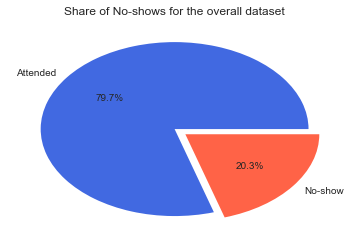

In [22]:
# In general what is the share of no-shows across the dataset
plt.pie(df['No_show'].value_counts(), explode=[0, 0.1], labels=['Attended', 'No-show'], colors=['royalblue', 'tomato'], autopct='%1.1f%%')
plt.title('Share of No-shows for the overall dataset');

### Research Question 1.A: Is there a characteristic that stands out for no-show appointments?

The characteristics *'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received'* in the dataset are all of the same format, which makes it easy to perform analysis. <br>
Graphs can offer a good way to directly see differences. Therefore, a function is written to plot the `mean-vlaue` for no-shows across the different characteristics.

In [23]:
# Defining a function to plot across all characteristics
def draw_bar(characteristic):
    locations = [1, 2, 3]
    colors = ['dimgrey', 'coral', 'seagreen']
    
    # DataFrames to examine
    val_0 = df[df[characteristic] == 0]['No_show'].mean()
    val_1 = df[df[characteristic] == 1]['No_show'].mean()
    
    heights = [df['No_show'].mean(), val_0, val_1]
    labels = ['Total \n dataset', 'no-{}'.format(characteristic), '{}'.format(characteristic)]
    
    fig = plt.bar(locations, heights, tick_label=labels, color=colors)
    
    plt.title('Relationship between \n {} and no-{} for no-show'.format(characteristic, characteristic))
    plt.ylabel('Share of No-shows');
    
    # print all the graphs
    plt.show()

In [24]:
# Selecting the characteristics to look at
characteristics = list(df.columns.values[7:-1])
characteristics

['Scholarship',
 'Hypertension',
 'Diabetes',
 'Alcoholism',
 'Handicap',
 'SMS_received']

The list for the characteristics is accessed programmatically to avoid spelling errors. It is also possible to hand code a list of values, if one wants more flexibility or a selection of specific characteristics and not all. the variable name is repeated to ensure, that the right list has been generated.

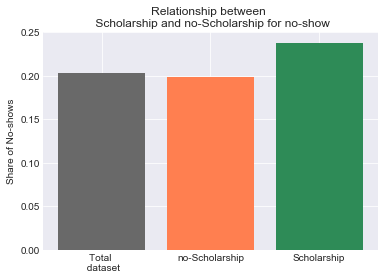

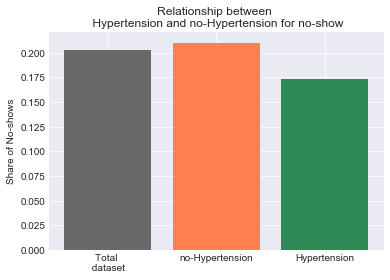

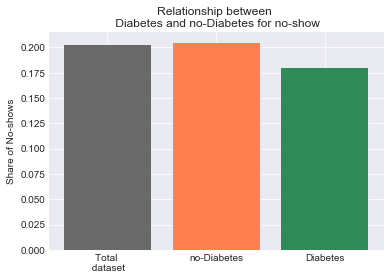

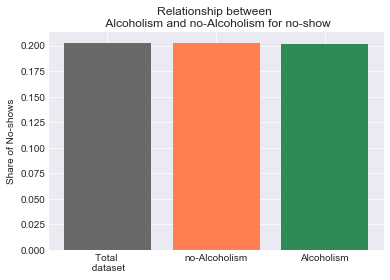

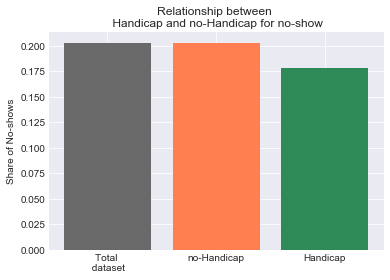

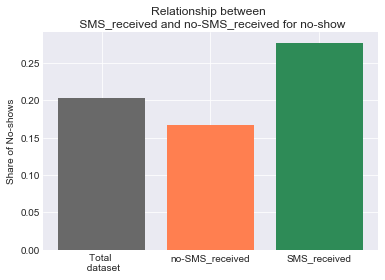

In [25]:
# Running the function through the list of characteristics
for c in characteristics:
        draw_bar(c)

#### First conclusion
Based on the generated graphs, one can see that patients with a Scholarship have a higher share in No-shows than other characteristics. What is also striking is that receiving an SMS as a reminder of the appointment, does not seem to have a positive effect in reducing the share in no-shows. This should be further investigated.
<br>
Other characteristics, like Hypertension, Diabetes, Alcoholism or Handicap do not show an increase in the share of no-shows compared to the average share across the total dataset. On the contrary patients with this characteristic tend to have better attendance on average than patients without these characteristics.

### Research Question 2: Does alcoholisms show different shares in no-shows when comparing men and women?
Following this first insight, it is interesting to zoom into other profiles more closely. First I would like to explore alcoholisms more, as it is surprising that the graphic for this characteristic shows no significant difference between the values for the total dataset and the values for no-alcoholism and alcoholism. <br>
<br>
To approach this questions, I first create a DataFrame containing only patients that suffer from alcoholism. In the next step I take a closer look at the share of no-shows among women and men within this dataset. <br>
In order to be able to see the results more easily a visualization in form of a bar chart like before is made.

In [26]:
# Creating a DataFrame with only patients with alcoholism
alcohol = df.query('Alcoholism == 1')

In [27]:
# Defining the categories
women_alc = alcohol.query('Gender =="F"')['No_show'].mean()
men_alc = alcohol.query('Gender =="M"')['No_show'].mean()

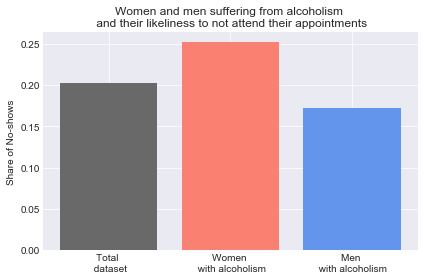

In [28]:
# Create a bar chart to compate women and men with alcoholism
locations = [1, 2, 3]
colors = ['dimgrey', 'salmon', 'cornflowerblue']
heights = [df['No_show'].mean(), women_alc, men_alc]
labels = ['Total \n dataset', 'Women \n with alcoholism', 'Men \n with alcoholism']
plt.bar(locations, heights, tick_label=labels, color=colors)
plt.title('Women and men suffering from alcoholism \n and their likeliness to not attend their appointments')
plt.ylabel('Share of No-shows')
plt.tight_layout();

The graphic clearly shows that among women suffering from alcoholism the share of no-shows is slightly above 25%, 5% higher than across the total dataset. On the other hand the men in the sample suffering from alcoholism, have a lower share in no-shows compared to the average across the total dataset.

### Research Question 2A: Is there a differences when comparing age categories?
Next I want to have a closer look at age groups and the share of no-shows within these. <br>
<br>
For this I use the original DataFrame `df` and create different age categories to look at, similar to the approach taken for men and women. <br>
In order to be able to see the results more easily a visualization in form of a bar chart like before is made.

In [29]:
# Defining age categories
kids = df.query('Age < 18')['No_show'].mean()
YA = df.query('17 < Age < 25')['No_show'].mean()
adults = df.query('24 < Age < 45')['No_show'].mean()
middle_aged = df.query('44 < Age < 60')['No_show'].mean()
seniors = df.query('Age > 59')['No_show'].mean()

The cell above creates the different age categories to plot together. The following age brackets are used: <br>
- **Kids**: ages below 18 years
- **Young Adults**: ages from 18 to 24 years (inclusive)
- **Adults**: ages from 25 to 44 years (inclusive)
- **Middle Aged**: ages from 45 to 59 years (inclusive)
- **Seniors**: ages above 60 years (inclusive)

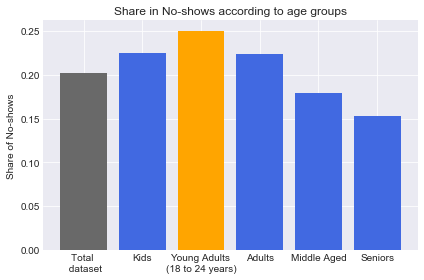

In [30]:
# Create a bar chart to compare across age categories
locations = [1, 2, 3, 4, 5, 6]
colors = ['dimgrey', 'royalblue', 'orange', 'royalblue', 'royalblue', 'royalblue']
heights = [df['No_show'].mean(), kids, YA, adults, middle_aged, seniors]
t_labels = ['Total \n dataset', 'Kids', 'Young Adults \n(18 to 24 years)', 'Adults', 'Middle Aged', 'Seniors']

plt.bar(locations, heights, tick_label=t_labels, color=colors)
plt.title('Share in No-shows according to age groups')
plt.ylabel('Share of No-shows')
plt.tight_layout();

#### Second conclusion
Based on the analysis and what is clear from the visualizations, women suffering from alcoholism and young adults ages 18 to 24 years, show high shares in no-shows, both around 25%. <br>

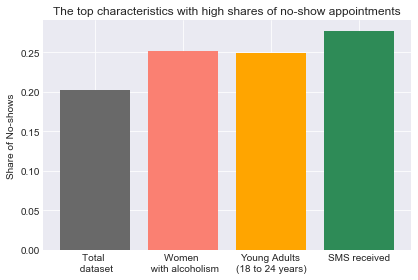

In [31]:
# Comparision between the top issues
locations = [1, 2, 3, 4]
colors = ['dimgrey', 'salmon', 'orange', 'seagreen']
heights = [df['No_show'].mean(), women_alc, YA, df.query('SMS_received == 1')['No_show'].mean()]
labels = ['Total \n dataset', 'Women \n with alcoholism', 'Young Adults \n(18 to 24 years)', 'SMS received']
plt.bar(locations, heights, tick_label=labels, color=colors)
plt.title('The top characteristics with high shares of no-show appointments')
plt.ylabel('Share of No-shows')
plt.tight_layout();

Including all the findings into one graphic, shows that they are in a similar range, roughly 5-7% points above the average across the dataset. <br>
Again, among the closer examined characteristics receiving an SMS as a reminder of the appointment does not result in a smaller share in no-show appointments. Further analysis should be done to uncover correlations.

### Research Question 3: Is there something to note regarding the time passed between scheduling day and appointment date?

In [32]:
df.dtypes

Patient_ID          int64
Gender             object
Scheduled_Day      object
Scheduled_Time     object
Appointment_Day    object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hypertension        int64
Diabetes            int64
Alcoholism          int64
Handicap            int64
SMS_received        int64
No_show             int64
dtype: object

Here is a check of the dtypes, to see if some have reset themselves following the download of the cleaned data and the reloading of the dataset. It is visible that the datetime datatypes have not been preserved. They will have to be changed again.

In [33]:
# Set relevant columns back to datetime
df['Scheduled_Day'] = pd.to_datetime(df['Scheduled_Day'])
df['Appointment_Day'] = pd.to_datetime(df['Appointment_Day'])

In [34]:
# Understanding how much time is between the appointment day and day it was scheduled
df['Days_in_Advance'] = df['Appointment_Day'] - df['Scheduled_Day']
df.head(10)

,Patient_ID,Gender,Scheduled_Day,Scheduled_Time,Appointment_Day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,Days_in_Advance
0,29872499824296,F,2016-04-29,18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,0 days
1,558997776694438,M,2016-04-29,16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0,0 days
2,4262962299951,F,2016-04-29,16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0,0 days
3,867951213174,F,2016-04-29,17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,0 days
4,8841186448183,F,2016-04-29,16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0,0 days
5,95985133231274,F,2016-04-27,08:36:51,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,0,2 days
6,733688164476661,F,2016-04-27,15:05:12,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,1,2 days
7,3449833394123,F,2016-04-27,15:39:58,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,1,2 days
8,56394729949972,F,2016-04-29,08:02:16,2016-04-29,21,ANDORINHAS,0,0,0,0,0,0,0,0 days
9,78124564369297,F,2016-04-27,12:48:25,2016-04-29,19,CONQUISTA,0,0,0,0,0,0,0,2 days


A new column has been added to the DataFrame that includes the how many days in advance the appointment has been scheduled. This will allow for further analysis and comparison between the days between scheduling the appointment and the actual appointment.

In [35]:
# Make two DataFrames with all no-shows and attended appointments
no_show = df.query('No_show == 1')
attended = df.query('No_show == 0')

Two DataFrames are created similar to the `alcohol-DataFrame`, which contain only the no-show appointments (`no_show`) and the attended appointments (`attended`). In the next step these DataFrames are used to create histograms for the distribution of days between scheduling and the actual appointment.

In [36]:
def draw_hist(datafr, label, color, title):
    (datafr['Days_in_Advance']/pd.Timedelta(days=1)).hist(bins=50, label=label, color=color)
    
    # adding chart elements
    plt.xlabel('Number of days between scheduled day and day of the appointment')
    plt.ylabel('# of times it took these days')
    plt.legend()
    plt.title(title)

Several histograms are plotted, so a function is written to avoid repetitive code.

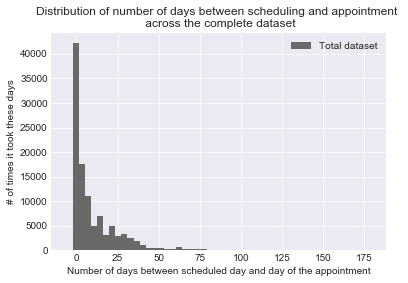

In [37]:
# plotting original df DataFrame with set of additional custom variables
var1, var2, var3 = ('Total dataset','dimgrey','Distribution of number of days between scheduling and appointment \n across the complete dataset')
draw_hist(df, var1, var2, var3)

The first histogram shows the distribution of days that passed between scheduling and actual appointment across the complete dataset, stored in df. The style variables are bunched together in one list, the chosen DataFrame was intentionally left out of this list, so it is directly visible in the function, which DataFrame is used. <br>
<br>
It is visible that he majority of appointments are scheduled on the same day or only a few days in advance.

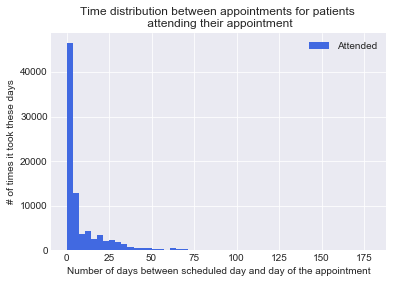

In [38]:
# plotting attended DataFrame with new set of variables
varA, varB, varC = ('Attended','royalblue', 'Time distribution between appointments for patients \n attending their appointment')
draw_hist(attended, varA, varB, varC)

Next, the same histogram is produced for the attended appointments. Here it is even more clear that the majority of appointments are scheduled same day.

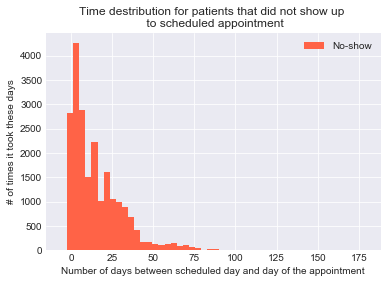

In [39]:
# plotting no_show DataFrame with new set of variables
varX, varY, varZ = ('No-show','tomato','Time destribution for patients that did not show up \n to scheduled appointment')
draw_hist(no_show, varX, varY, varZ)

Producing the same histogram for the appointments that were noted down as no-shows it is clearly visible, that while the histogram is still skewed right, no-show appointments are more often scheduled several days and even weeks in advance than appointments that are attended. 

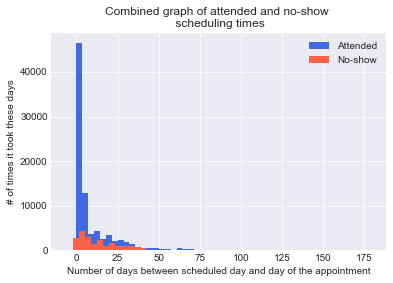

In [40]:
# Plotting both together
draw_hist(attended,varA, varB, varC)
draw_hist(no_show,varX, varY, varZ)
plt.title('Combined graph of attended and no-show \n scheduling times');

As a final plot, both distributions for attended and no-show appointments are plotted together, to visualize again that the share in no-shows is around a fifth among all appointments in the dataset. This also highlights, the value gained from plotting both cases separately and thus allowing for greater detail on the distribution.

<a id='conclusions'></a>
## 4. Conclusions
Throughout the notebook, the first conclusions have been drawn from the initial exploratory analysis of the dataset. At this point it should be noted that this first exploratory analysis has not provided rigorous statistical analysis and the first results do not imply that certain characteristics lead to a no-show in appointment. It merely provides an indication of what type of factors seem to show a higher share in no-show appointments and offer a promising start for further, deeper investigation. <br>
<br>
To summarize the main conclusions made following the posed research questions:

- Characteristics, like *Hypertension, Diabetes, Alcoholism or Handicap* do not show an increase in the share of no-shows compared to the average share across the total dataset. On the contrary patients with this characteristic tend to have better attendance on average than patients without these characteristics.

- Receiving a SMS as a reminder of the appointment, does not seem to reduce the share in no-shows. This raises the hypothesis that no-shows do not necessarily result from forgetting the appointment. This should be further investigated, with further data collected in terms of when the SMS was sent (see also *4.1 Suggested next steps*) 

- Plotting the share in no-shows together shows that they are in a similar range, roughly 5-7% points above the average across the dataset, which is rougly 20% no-shows.

- Among no-show appointments longer periods between scheduling the appointment and the appointment day are more common than when looking only at attended appointments or across the entire dataset.
- Most attended appointments were scheduled on the day of the appointment or only a few days in advance. 
- These findings raise the hypotheses that the majority of appointments are of urgent type or way of life makes it challenging to plan appointments well in advance and then holding these appointments. This should be further investigated and additional data collected to help with analysis (see also *4.1 Suggested next steps*)

### 4.1 Suggested next steps

As this was an initial investigation exercise, the following next steps are recommended to understand better and get a more complete picture of the situation:

- Collect more data (like time of appointment, time SMS was sent, ease of re-scheduling and broad type of appointment (check-ups vs important appointments)
- Survey patients on reasons why they were not able to attend their scheduled appointment and what would have helped them be able to attend
- What are no-shows costing the hospital and who shoulders the burden of these costs